In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv("tweets_with_topics_sentiment.csv")

In [3]:
df.dtypes

Unnamed: 0.2                int64
Unnamed: 0.1                int64
Unnamed: 0                  int64
edit_history_tweet_ids     object
author_id                   int64
created_at                 object
conversation_id             int64
id                        float64
text                       object
geo.place_id               object
referenced_tweets          object
city                       object
inside                    float64
withheld.copyright         object
withheld.country_codes     object
withheld.scope            float64
hashtag                    object
text_hash_split            object
text_clean                 object
dominant_topic             object
neg_prob                  float64
neu_prob                  float64
pos_prob                  float64
sentiment_numeric           int64
sentiment                  object
dtype: object

In [4]:
df.city.unique()

array(['Fort Worth', 'San Antonio', 'Phoenix', 'Las Vegas',
       'Jacksonville', 'San Francisco', 'New York', 'Washington DC',
       'Boston', 'Chicago', 'Tampa', 'Kansas City', 'Raleigh',
       'Philadelphia', 'Pittsburgh', 'New Orleans', 'Los Angeles'],
      dtype=object)

In [5]:
growing_cities = ['Fort Worth', 'San Antonio', 'Phoenix', 'Las Vegas',
       'Jacksonville', 'Tampa', 'Kansas City', 'Raleigh']

In [6]:
df['growing'] = np.where(df.city.isin(growing_cities), 1, 0)

In [7]:
df.loc[df.dominant_topic == "exploring", 'dominant_topic'] = "explore"

In [8]:
topic_labels = df.dominant_topic.unique()

In [9]:
topics = df.pivot_table(index="growing", columns="dominant_topic", values="id", aggfunc="count").reset_index()

In [10]:
len(df)

27200

In [11]:
(df.growing == 1).sum()

12800

In [12]:
total = [14400, 12800]

In [13]:
topics['total'] = total
topics['status'] = ['shrinking', 'growing']

In [14]:
for col in topic_labels:
    topics[col] = topics[col] / topics.total

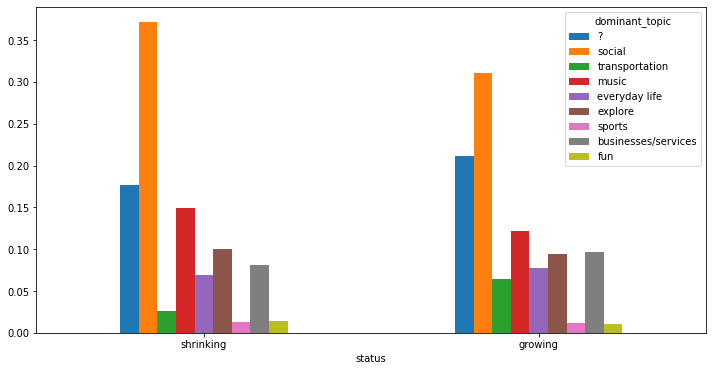

In [15]:
#plt.bar(topics['status'], topics[topic_labels])
fig, ax = plt.subplots(figsize=(12, 6))
topics.plot(x="status", y=topic_labels, kind="bar", rot=0, ax=ax)
fig.savefig("topic_dis.png")

In [16]:
topics2 = df.pivot_table(index=["growing", "inside"], columns="dominant_topic", values="id", aggfunc="count").reset_index()

In [17]:
topics2.head()

dominant_topic,growing,inside,?,businesses/services,everyday life,explore,fun,music,social,sports,transportation
0,0,0.0,1266,808,509,790,105,1087,2554,66,15
1,0,1.0,1274,362,483,661,94,1057,2794,116,359
2,1,0.0,1245,993,526,711,86,781,1927,77,54
3,1,1.0,1464,243,465,497,55,783,2052,68,773


In [18]:
totals = []
for i in range(2):
    for j in range(2):
        totals.append(len(df.loc[(df.growing == i)&(df.inside==j)]))

In [19]:
topics2['total'] = totals

In [20]:
topics2['status'] = ['Shrinking/Outside', 'Shrinking/Inside', "Growing/Outside", "Growing/Inside"]

In [21]:
for col in topic_labels:
    topics2[col] = topics2[col] / topics2.total

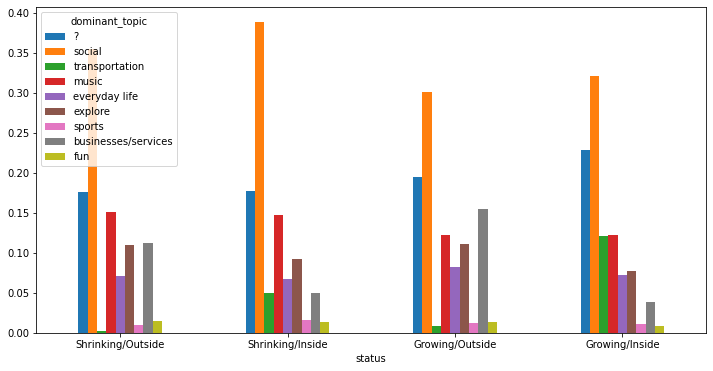

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
topics2.plot("status", y=topic_labels, kind="bar", rot=0, ax=ax)
fig.savefig("topic_dis2.png")

In [23]:
df["positive"] = np.where(df.sentiment == 'positive', 1, 0)
df["negative"] = np.where(df.sentiment == 'negative', 1, 0)

In [24]:
sentiment = df.pivot_table(index="growing", values=['negative', 'positive'], aggfunc="mean").reset_index()

In [25]:
sentiment

,growing,negative,positive
0,0,0.065278,0.386528
1,1,0.057109,0.372578


In [26]:
sentiment2 = df.pivot_table(index=["growing", "inside"], values=['negative', 'positive'], aggfunc="mean").reset_index()

In [27]:
sentiment2

,growing,inside,negative,positive
0,0,0.0,0.075833,0.372639
1,0,1.0,0.054722,0.400417
2,1,0.0,0.060312,0.356719
3,1,1.0,0.053906,0.388437


In [28]:
topics_sentiment = df.groupby(['growing', 'dominant_topic'])[['negative', 'positive']]\
.mean().reset_index().pivot(index="dominant_topic", columns="growing", values=["negative", "positive"])

In [29]:
topics_sentiment_location = df.groupby(['growing', 'dominant_topic', "inside"])[['negative', 'positive']].mean()

In [30]:
topics_sentiment.columns = ['Negative/Shrinking', 'Negative/Growing', "Positive/Shrinking", "Positive/Growing"]

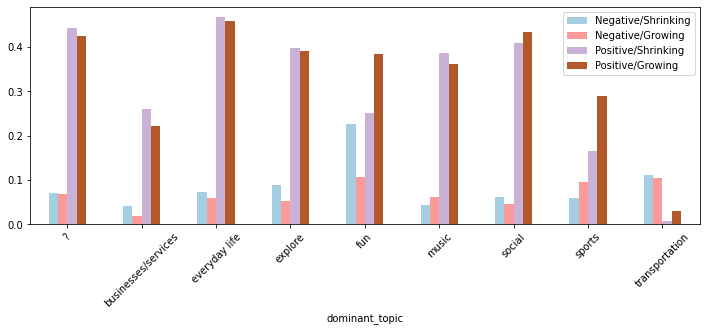

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
topics_sentiment.plot(kind="bar", ax=ax, rot=45, cmap="Paired")
fig.savefig("topic_sentiment.png",  bbox_inches = "tight")

In [32]:
topics_sentiment_location = topics_sentiment_location.reset_index()

tsl_inside = topics_sentiment_location.loc[topics_sentiment_location.inside == 1].pivot(index="dominant_topic", columns="growing", values=["negative", "positive"])
tsl_outside = topics_sentiment_location.loc[topics_sentiment_location.inside == 0].pivot(index="dominant_topic", columns="growing", values=["negative", "positive"])

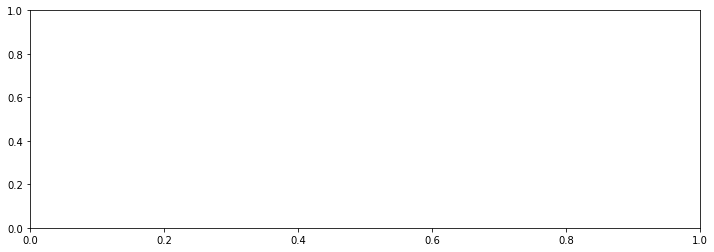

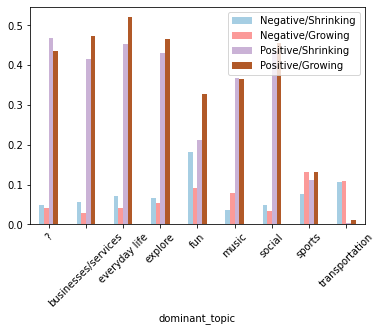

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
tsl_inside.columns = ['Negative/Shrinking', 'Negative/Growing', "Positive/Shrinking", "Positive/Growing"]
tsl_inside.plot(kind="bar", rot=45, cmap="Paired")
fig.savefig("topic_sentiment_inside.png",  bbox_inches = "tight")

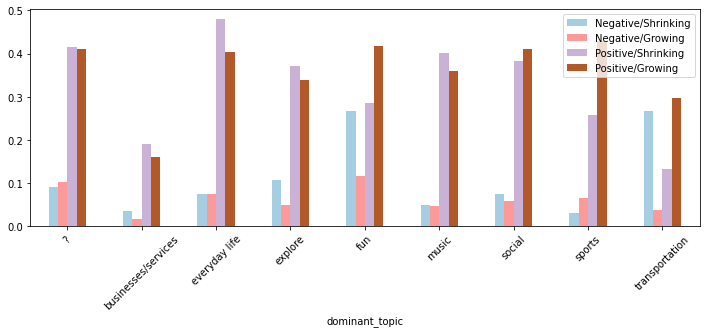

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))

tsl_outside.columns = ['Negative/Shrinking', 'Negative/Growing', "Positive/Shrinking", "Positive/Growing"]
tsl_outside.plot(kind="bar", figsize=(12, 4), rot=45, cmap="Paired", ax=ax)
fig.savefig("topic_sentiment_outside.png",  bbox_inches = "tight")